In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from matplotlib import pyplot

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\ANUSHA\Documents\NIIT_C9_ML\Project\DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv",sep = ";")
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


# Replacing Reason for absence with numerical Values 

In [3]:
print(sorted(df["Reason for absence"].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28]


In [4]:
df["Reason for absence"] = df["Reason for absence"].replace({
    0: "Unknown",
    1: "Certain infectious and parasitic diseases",
    2: "Neoplasms",
    3: "Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism",
    4: "Endocrine, nutritional and metabolic diseases",
    5: "Mental and behavioural disorders",
    6: "Diseases of the nervous system",
    7: "Diseases of the eye and adnexa",
    8: "Diseases of the ear and mastoid process",
    9: "Diseases of the circulatory system",
    10: "Diseases of the respiratory system",
    11: "Diseases of the digestive system",
    12: "Diseases of the skin and subcutaneous tissue",
    13: "Diseases of the musculoskeletal system and connective tissue",
    14: "Diseases of the genitourinary system",
    15: "Pregnancy, childbirth and the puerperium",
    16: "Certain conditions originating in the perinatal period",
    17: "Congenital malformations, deformations and chromosomal abnormalities",
    18: "Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified",
    19: "Injury, poisoning and certain other consequences of external causes",
    20: "External causes of morbidity and mortality", 
    21: "Factors influencing health status and contact with health services",
    22 : "And 7 categories without (CID) patient follow-up",
    23: "Medical consultation",
    24: "Blood donation",
    25: "Laboratory examination",
    26: "Unjustified absence" ,
    27: "Physiotherapy",
    28: "dental consultation"
})


# Replacing Month of absence with numerical Values 

In [5]:
print(sorted(df["Month of absence"].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [6]:
df["Month of absence"] = df["Month of absence"].replace({
    0: "Unknown",
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
})

In [7]:
df["Month of absence"].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June', 'Unknown'],
      dtype=object)

# Replacing Day of the week with numerical Values 

In [8]:
print(sorted(df["Day of the week"].unique()))

[2, 3, 4, 5, 6]


In [9]:
df["Day of the week"] = df["Day of the week"].replace({
    2: "Monday",
    3: "Tuesday",
    4: "Wednesday",
    5: "Thursday",
    6: "Friday"
})

In [10]:
df["Day of the week"].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype=object)

# Replacing Seasons with numerical Values 

In [11]:
print(sorted(df["Seasons"].unique()))

[1, 2, 3, 4]


In [12]:
df["Seasons"] = df["Seasons"].replace({
    1: "Summer",
    2: "Autumn",
    3: "Winter",
    4: "Spring"
})

In [13]:
df["Seasons"].unique()

array(['Summer', 'Spring', 'Autumn', 'Winter'], dtype=object)

In [14]:
# Replacing Education with numerical Values 

In [15]:
print(sorted(df["Education"].unique()))

[1, 2, 3, 4]


In [16]:
df["Education"] = df["Education"].replace({
    1: "High School",
    2: "Graduate",
    3: "Postgraduate",
    4: "Master and Doctor"
})

In [17]:
df["Education"].unique()

array(['High School', 'Postgraduate', 'Graduate', 'Master and Doctor'],
      dtype=object)

# Replacing Disciplinary failure","Social drinker","Social smoker with numerical Values 

In [18]:
z = ["Disciplinary failure","Social drinker","Social smoker"]

for i in z:
    df[i] = df[i].replace({0: "No",1: "Yes"})

In [19]:
df["Disciplinary failure"].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
df["Social drinker"].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
df["Social smoker"].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
# Objectives 

# 1.Find out the ID of the employees who are frequently absent and suggest appropriate actions.
# 2.what can the management do to reduce the absentism.
# 3.which ID of employees should be encouraged for low absentism
# 4.what is the top 5 reason
# 5.The ID of the employees who are frequently absent are achieving their target to what level.

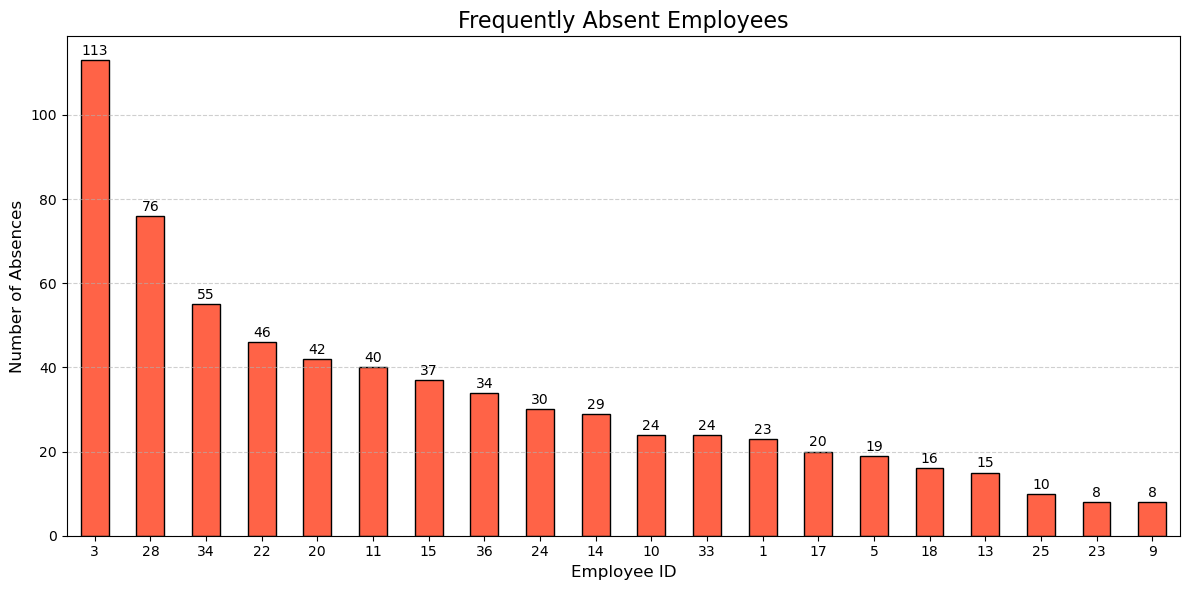

In [23]:
# Objectives 
# 1.Find out the ID of the employees who are frequently absent and suggest appropriate actions.

absence_counts = df["ID"].value_counts().sort_values(ascending=False)
top_absentees = absence_counts.head(20)

plt.figure(figsize=(12, 6))
bars = top_absentees.plot(kind='bar', color='tomato', edgecolor='black')

plt.title('Frequently Absent Employees', fontsize=16)
plt.xlabel('Employee ID', fontsize=12)
plt.ylabel('Number of Absences', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for idx, value in enumerate(top_absentees.values):
    plt.text(x=idx, y=value + 0.5, s=str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Employee ID 3 is Most Frequently Absent of 113 days

In [24]:
# Objectives 
# 2.what can the management do to reduce the absentism.

# Conduct employee surveys and feedback sessions.
# Build a positive and inclusive work culture.
# Provide medical insurance and mental health support.
# Introduce remote work or hybrid models where possible.
# Allow flexible hours or compressed workweeks.

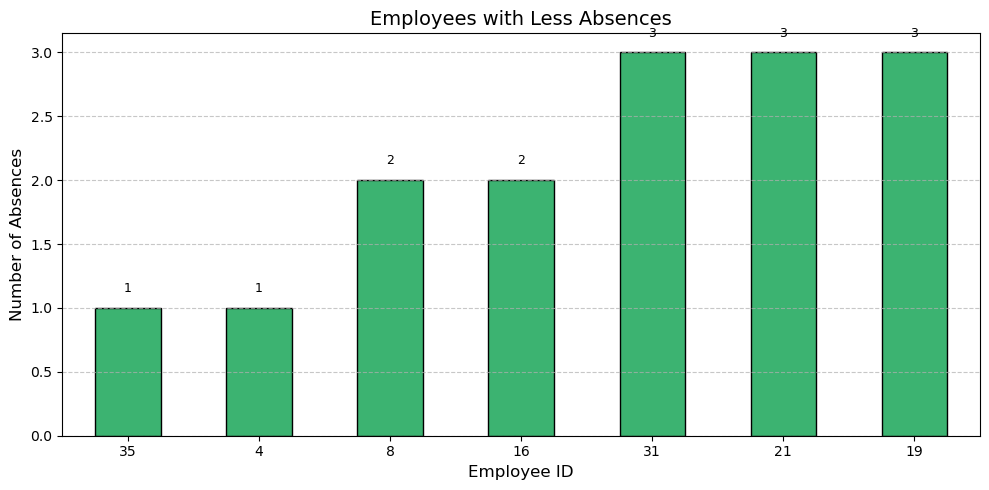

In [25]:
# Objectives 
# 3.which ID of employees should be encouraged for low absentism

absence_counts = df["ID"].value_counts().sort_values()
low_absentees = absence_counts[absence_counts < 5]

plt.figure(figsize=(10, 5))
low_absentees.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Employees with Less Absences', fontsize=14)
plt.xlabel('Employee ID', fontsize=12)
plt.ylabel('Number of Absences', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(low_absentees.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Employee ID 35 Has less number of Absences.

Top 5 Reasons for Absences:
Reason for absence
Medical consultation                                            149
dental consultation                                             112
Physiotherapy                                                    69
Diseases of the musculoskeletal system and connective tissue     55
Unknown                                                          43
Name: count, dtype: int64


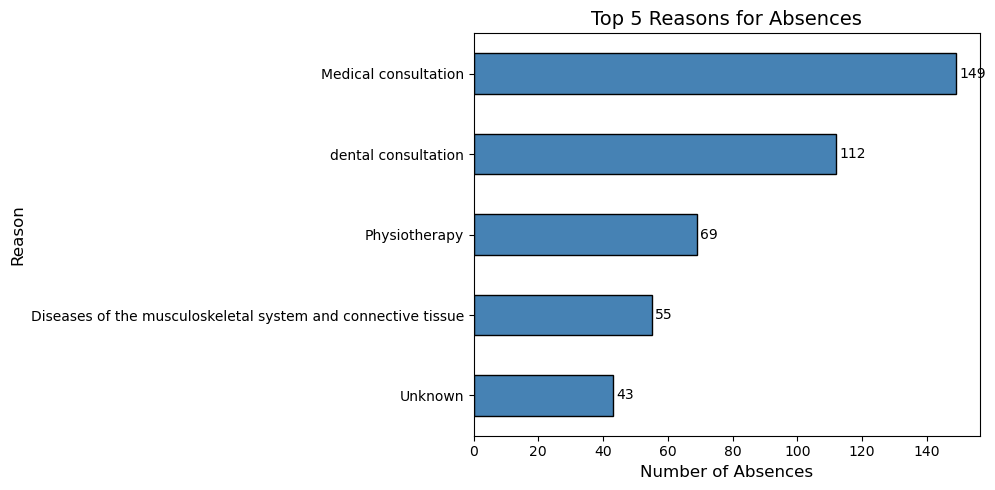

In [26]:
# Objectives
# 4.what is the top 5 reason for Absences

top_reasons = df["Reason for absence"].value_counts().head(5)
print("Top 5 Reasons for Absences:")
print(top_reasons)

plt.figure(figsize=(10, 5))
top_reasons.plot(kind='barh', color='steelblue', edgecolor='black')
plt.title('Top 5 Reasons for Absences', fontsize=14)
plt.xlabel('Number of Absences', fontsize=12)
plt.ylabel('Reason', fontsize=12)
plt.gca().invert_yaxis()  # Highest reason at the top

for i, value in enumerate(top_reasons.values):
    plt.text(value + 1, i, str(value), va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Top 5 Reasons for Absent.

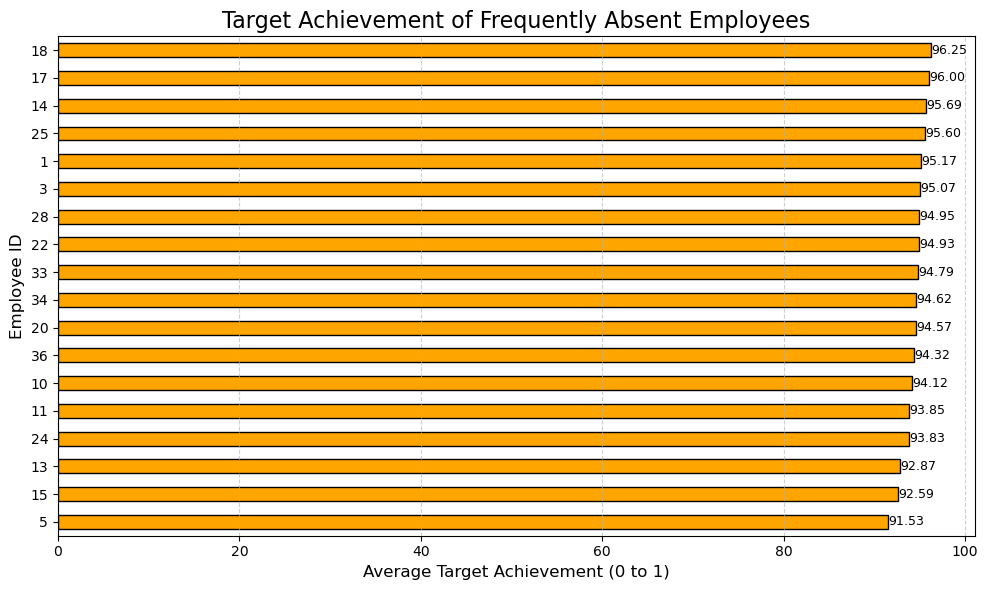

In [27]:
# # Objectives
# 5.The ID of the employees who are frequently absent are achieving their target to what level.

absence_counts = df["ID"].value_counts()
frequent_ids = absence_counts[absence_counts >= 10].index
frequent_absentees_df = df[df["ID"].isin(frequent_ids)]
target_summary = frequent_absentees_df.groupby("ID")["Hit target"].mean().sort_values(ascending=False)

# Improved Plot
plt.figure(figsize=(10, 6))
target_summary.sort_values().plot(kind='barh', color='orange', edgecolor='black')
plt.title("Target Achievement of Frequently Absent Employees", fontsize=16)
plt.xlabel("Average Target Achievement (0 to 1)", fontsize=12)
plt.ylabel("Employee ID", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

for i, (val, idx) in enumerate(zip(target_summary.sort_values().values, target_summary.sort_values().index)):
    plt.text(val + 0.01, i, f"{val:.2f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()


# Employee ID 18 as higest Achicer of sales of 96.25%

In [28]:
# Data Preprocessing 

In [29]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,Unjustified absence,July,Tuesday,Summer,289,36,13,33,239.554,...,No,High School,2,Yes,No,1,90,172,30,4
1,36,Unknown,July,Tuesday,Summer,118,13,18,50,239.554,...,Yes,High School,1,Yes,No,0,98,178,31,0
2,3,Medical consultation,July,Wednesday,Summer,179,51,18,38,239.554,...,No,High School,0,Yes,No,0,89,170,31,2
3,7,Diseases of the eye and adnexa,July,Thursday,Summer,279,5,14,39,239.554,...,No,High School,2,Yes,Yes,0,68,168,24,4
4,11,Medical consultation,July,Thursday,Summer,289,36,13,33,239.554,...,No,High School,2,Yes,No,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,Diseases of the genitourinary system,July,Tuesday,Summer,289,36,13,33,264.604,...,No,High School,2,Yes,No,1,90,172,30,8
736,1,Diseases of the digestive system,July,Tuesday,Summer,235,11,14,37,264.604,...,No,Postgraduate,1,No,No,1,88,172,29,4
737,4,Unknown,Unknown,Tuesday,Summer,118,14,13,40,271.219,...,No,High School,1,Yes,No,8,98,170,34,0
738,8,Unknown,Unknown,Wednesday,Autumn,231,35,14,39,271.219,...,No,High School,2,Yes,No,2,100,170,35,0


In [30]:
df.dtypes

ID                                   int64
Reason for absence                  object
Month of absence                    object
Day of the week                     object
Seasons                             object
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                object
Education                           object
Son                                  int64
Social drinker                      object
Social smoker                       object
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [31]:
categ = df.select_dtypes(exclude = "number")
categ

,Reason for absence,Month of absence,Day of the week,Seasons,Disciplinary failure,Education,Social drinker,Social smoker
0,Unjustified absence,July,Tuesday,Summer,No,High School,Yes,No
1,Unknown,July,Tuesday,Summer,Yes,High School,Yes,No
2,Medical consultation,July,Wednesday,Summer,No,High School,Yes,No
3,Diseases of the eye and adnexa,July,Thursday,Summer,No,High School,Yes,Yes
4,Medical consultation,July,Thursday,Summer,No,High School,Yes,No
...,...,...,...,...,...,...,...,...
735,Diseases of the genitourinary system,July,Tuesday,Summer,No,High School,Yes,No
736,Diseases of the digestive system,July,Tuesday,Summer,No,Postgraduate,No,No
737,Unknown,Unknown,Tuesday,Summer,No,High School,Yes,No
738,Unknown,Unknown,Wednesday,Autumn,No,High School,Yes,No


In [32]:
conti = df.select_dtypes(include = "number")
conti

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,289,36,13,33,239.554,97,2,1,90,172,30,4
1,36,118,13,18,50,239.554,97,1,0,98,178,31,0
2,3,179,51,18,38,239.554,97,0,0,89,170,31,2
3,7,279,5,14,39,239.554,97,2,0,68,168,24,4
4,11,289,36,13,33,239.554,97,2,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,289,36,13,33,264.604,93,2,1,90,172,30,8
736,1,235,11,14,37,264.604,93,1,1,88,172,29,4
737,4,118,14,13,40,271.219,95,1,8,98,170,34,0
738,8,231,35,14,39,271.219,95,2,2,100,170,35,0


# Outliers Treatment 

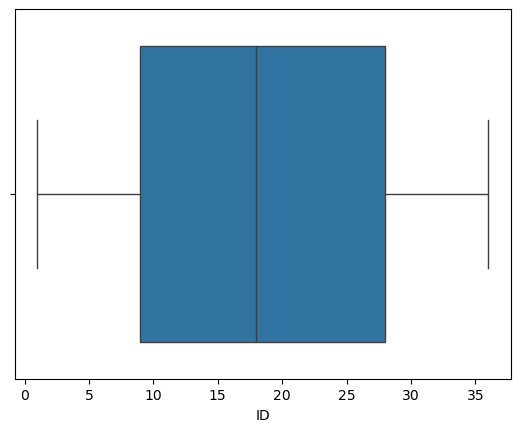

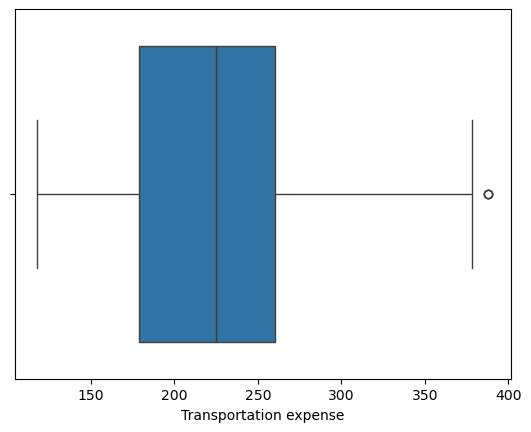

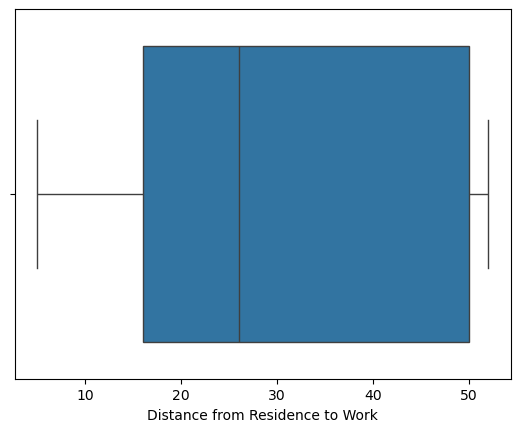

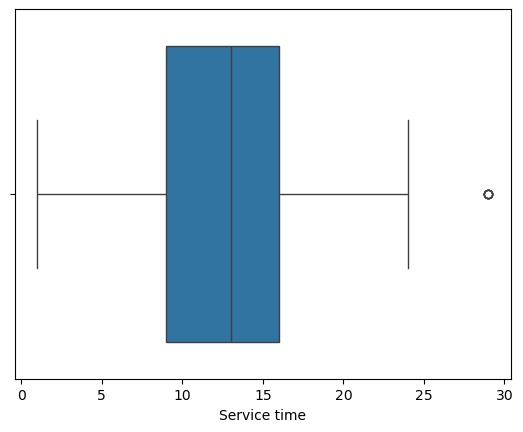

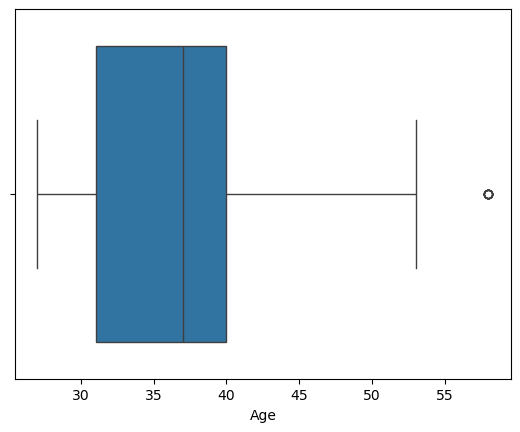

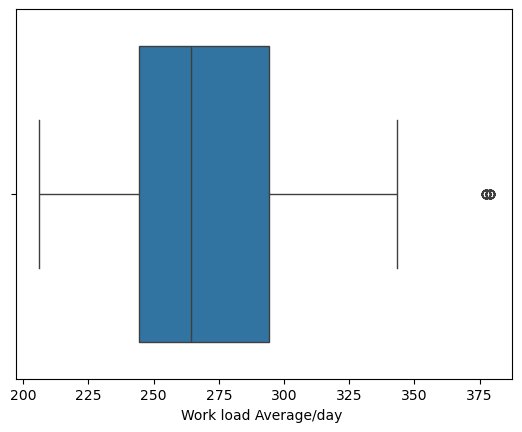

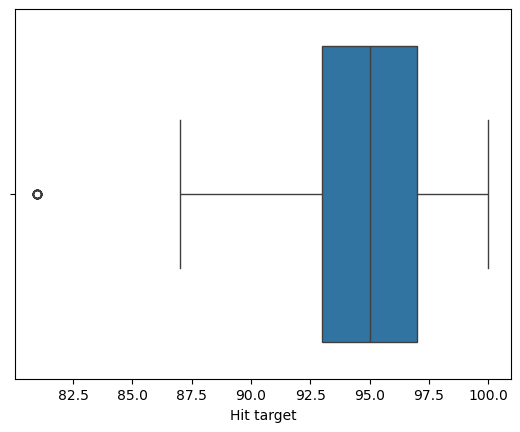

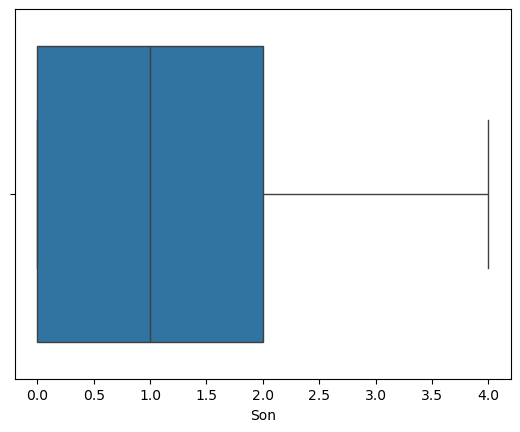

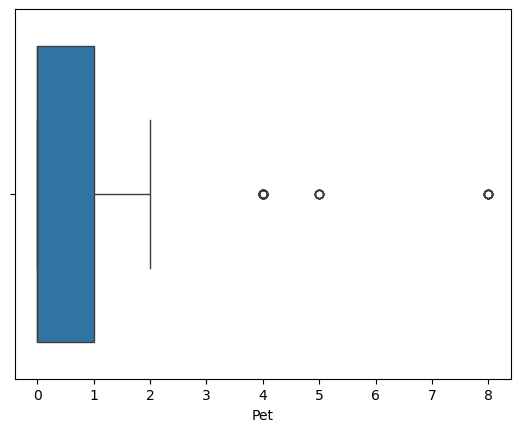

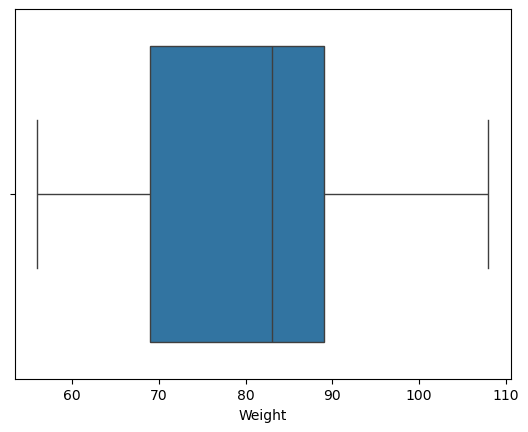

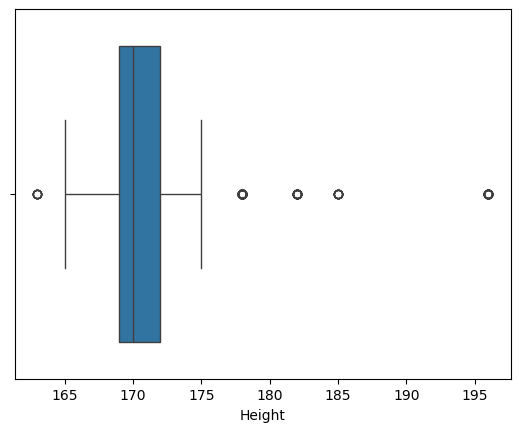

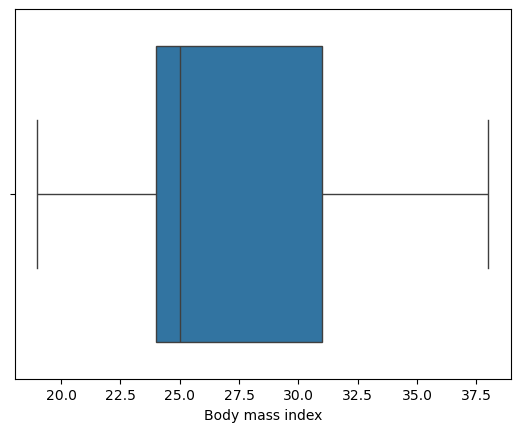

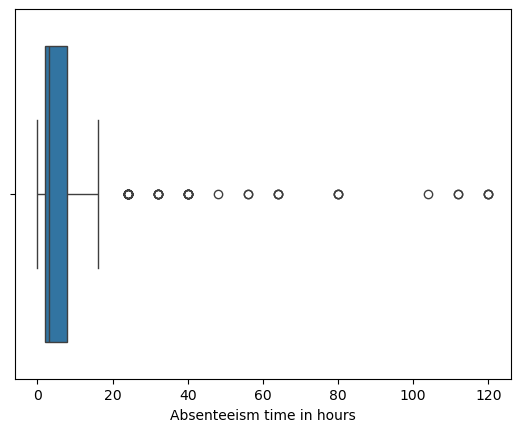

In [33]:


for col in conti.columns:
    sns.boxplot(x = conti[col])
    plt.show()

In [34]:
no_outlier = conti.copy()

def outlier_cleanup(col):
    # Calculate IQR and outlier fences
    q1 = no_outlier[col].quantile(0.25)
    q3 = no_outlier[col].quantile(0.75)
    iqr = q3 - q1
    lf = q1 - (1.5 * iqr)  # lower fence
    uf = q3 + (1.5 * iqr)  # upper fence

    # Check column type for proper handling of integer and float types
    col_type = str(no_outlier[col].dtype)

    # Apply outlier treatment
    if col_type in ["int64", "int32", "int16", "int8"]:
        # For integer columns, round the fence values and cast them to integers
        no_outlier.loc[no_outlier[col] < lf, col] = int(round(lf))
        no_outlier.loc[no_outlier[col] > uf, col] = int(round(uf))
    else:
        # For float columns, directly assign the fence values
        no_outlier.loc[no_outlier[col] < lf, col] = lf
        no_outlier.loc[no_outlier[col] > uf, col] = uf

In [35]:
for col in conti:
    outlier_cleanup(col)

In [36]:
no_outlier

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,289,36,13,33,239.554,97,2,1,90,172,30,4
1,36,118,13,18,50,239.554,97,1,0,98,176,31,0
2,3,179,51,18,38,239.554,97,0,0,89,170,31,2
3,7,279,5,14,39,239.554,97,2,0,68,168,24,4
4,11,289,36,13,33,239.554,97,2,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,289,36,13,33,264.604,93,2,1,90,172,30,8
736,1,235,11,14,37,264.604,93,1,1,88,172,29,4
737,4,118,14,13,40,271.219,95,1,2,98,170,34,0
738,8,231,35,14,39,271.219,95,2,2,100,170,35,0


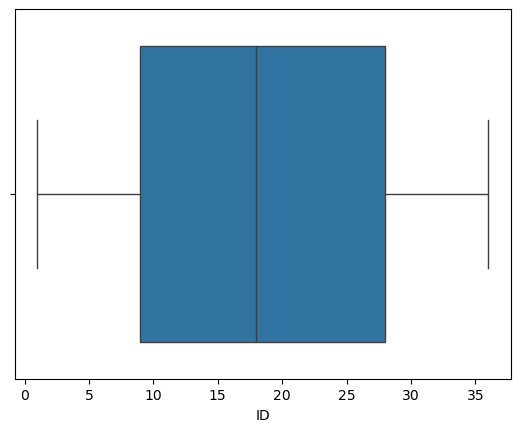

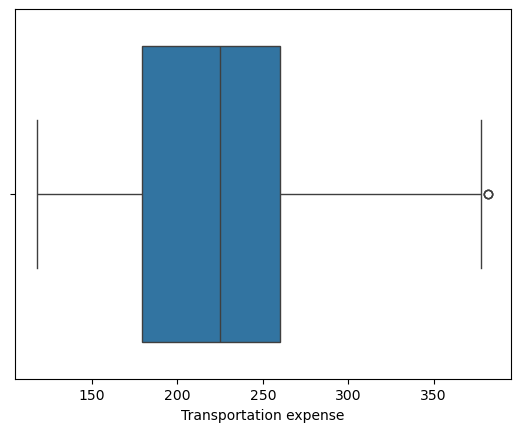

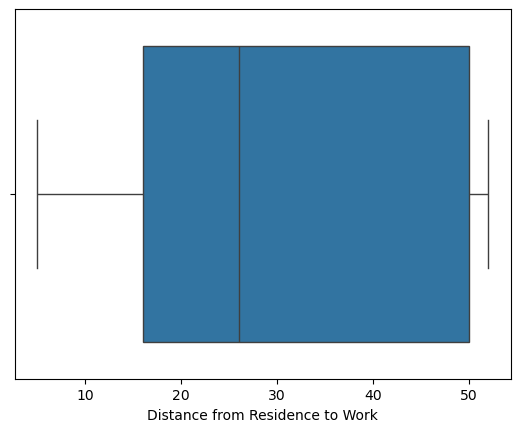

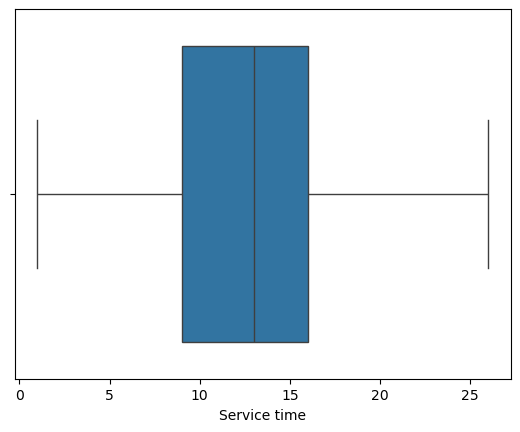

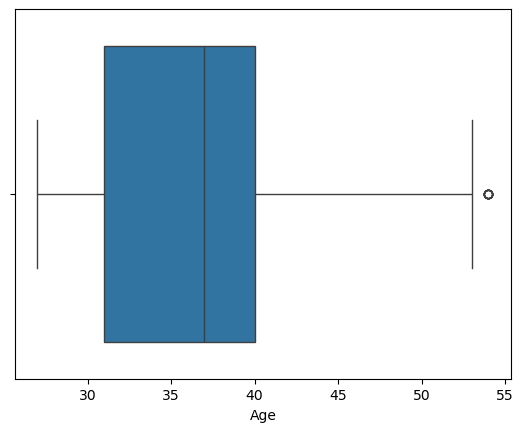

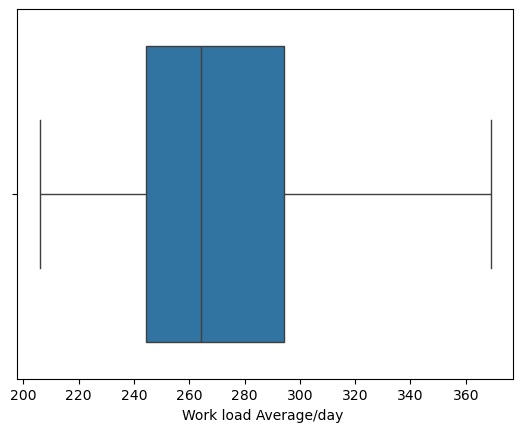

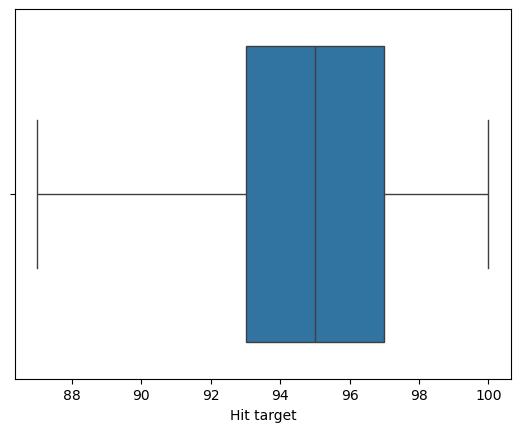

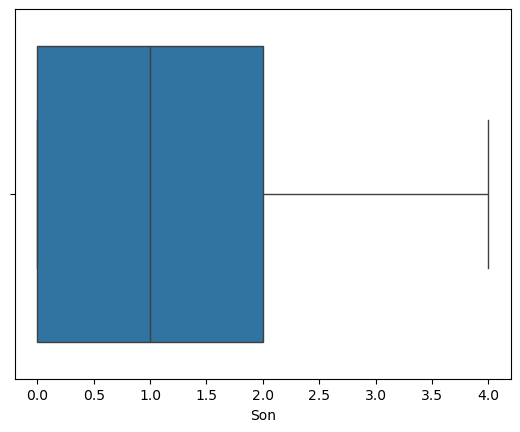

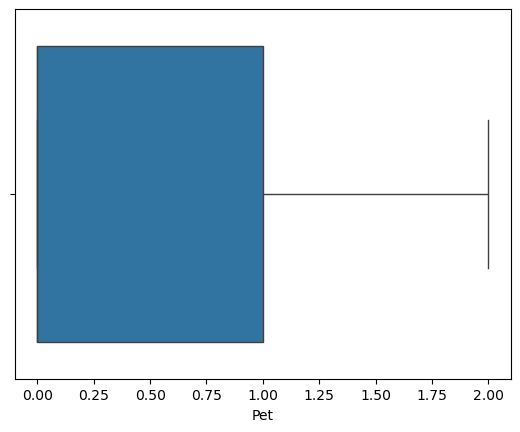

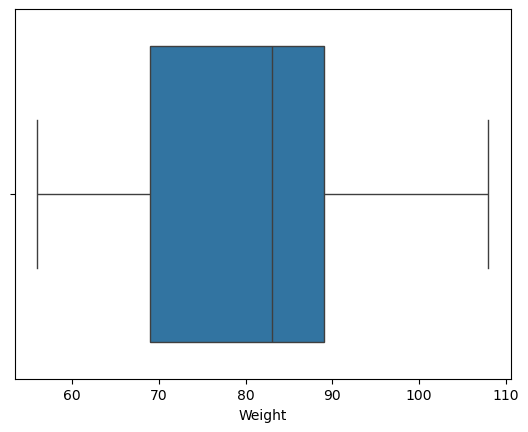

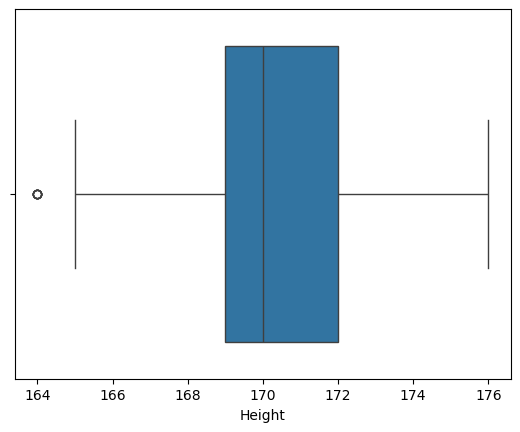

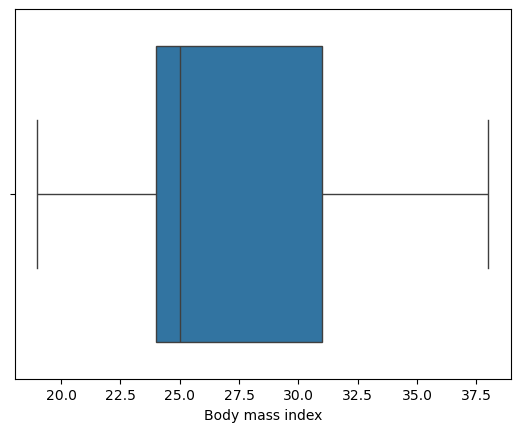

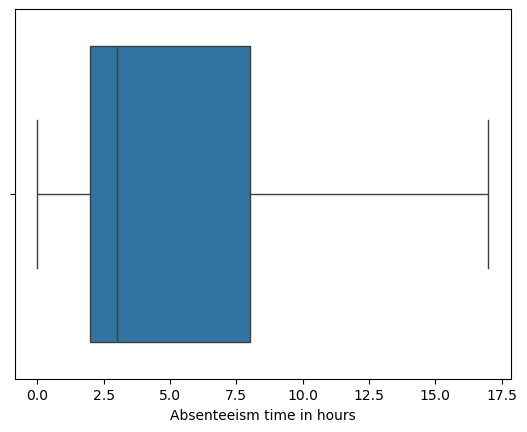

In [37]:
for col in no_outlier.columns:
    sns.boxplot(x = no_outlier[col])
    plt.show()

In [38]:
# Changing on_outliers as conti 
conti = no_outlier

In [39]:
conti

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,289,36,13,33,239.554,97,2,1,90,172,30,4
1,36,118,13,18,50,239.554,97,1,0,98,176,31,0
2,3,179,51,18,38,239.554,97,0,0,89,170,31,2
3,7,279,5,14,39,239.554,97,2,0,68,168,24,4
4,11,289,36,13,33,239.554,97,2,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,289,36,13,33,264.604,93,2,1,90,172,30,8
736,1,235,11,14,37,264.604,93,1,1,88,172,29,4
737,4,118,14,13,40,271.219,95,1,2,98,170,34,0
738,8,231,35,14,39,271.219,95,2,2,100,170,35,0


# Scaling the Values

In [40]:
Scaling_data = ['Transportation expense', 'Distance from Residence to Work',
'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Son',
'Pet', 'Weight', 'Height', 'Body mass index',
'Absenteeism time in hours']

my_scaling_object  = StandardScaler()
for i in Scaling_data:
    conti[i] = pd.DataFrame(my_scaling_object.fit_transform(conti[i].to_numpy().reshape(-1,1)))
conti

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,1.012673,0.429556,0.108116,-0.537146,-0.830594,0.681528,0.893723,0.541905,0.851673,0.377541,0.775932,-0.233397
1,36,-1.545391,-1.121694,1.267626,2.143259,-0.830594,0.681528,-0.017234,-0.719132,1.473056,1.799323,1.009438,-1.123676
2,3,-0.632865,1.441240,1.267626,0.251208,-0.830594,0.681528,-0.928191,-0.719132,0.774000,-0.333350,1.009438,-0.678537
3,7,0.863079,-1.661258,0.340018,0.408879,-0.830594,0.681528,0.893723,-0.719132,-0.857131,-1.044241,-0.625100,-0.233397
4,11,1.012673,0.429556,0.108116,-0.537146,-0.830594,0.681528,0.893723,0.541905,0.851673,0.377541,0.775932,-0.678537
...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,1.012673,0.429556,0.108116,-0.537146,-0.170828,-0.525727,0.893723,0.541905,0.851673,0.377541,0.775932,0.656881
736,1,0.204863,-1.256585,0.340018,0.093537,-0.170828,-0.525727,-0.017234,0.541905,0.696327,0.377541,0.542427,-0.233397
737,4,-1.545391,-1.054248,0.108116,0.566550,0.003397,0.077901,-0.017234,1.802942,1.473056,-0.333350,1.709954,-1.123676
738,8,0.145026,0.362110,0.340018,0.408879,0.003397,0.077901,0.893723,1.802942,1.628402,-0.333350,1.943459,-1.123676


# Label encoding 

In [41]:
encoder = preprocessing.LabelEncoder() 
for j in categ.columns:
    categ[j] = encoder.fit_transform(categ[j])
categ

,Reason for absence,Month of absence,Day of the week,Seasons,Disciplinary failure,Education,Social drinker,Social smoker
0,25,5,3,2,0,1,1,0
1,26,5,3,2,1,1,1,0
2,19,5,4,2,0,1,1,0
3,9,5,2,2,0,1,1,1
4,19,5,2,2,0,1,1,0
...,...,...,...,...,...,...,...,...
735,10,5,3,2,0,1,1,0
736,7,5,3,2,0,3,0,0
737,26,12,3,2,0,1,1,0
738,26,12,4,0,0,1,1,0


In [42]:
final_df = pd.concat([conti,categ],axis = 1)
final_df

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Son,Pet,Weight,...,Body mass index,Absenteeism time in hours,Reason for absence,Month of absence,Day of the week,Seasons,Disciplinary failure,Education,Social drinker,Social smoker
0,11,1.012673,0.429556,0.108116,-0.537146,-0.830594,0.681528,0.893723,0.541905,0.851673,...,0.775932,-0.233397,25,5,3,2,0,1,1,0
1,36,-1.545391,-1.121694,1.267626,2.143259,-0.830594,0.681528,-0.017234,-0.719132,1.473056,...,1.009438,-1.123676,26,5,3,2,1,1,1,0
2,3,-0.632865,1.441240,1.267626,0.251208,-0.830594,0.681528,-0.928191,-0.719132,0.774000,...,1.009438,-0.678537,19,5,4,2,0,1,1,0
3,7,0.863079,-1.661258,0.340018,0.408879,-0.830594,0.681528,0.893723,-0.719132,-0.857131,...,-0.625100,-0.233397,9,5,2,2,0,1,1,1
4,11,1.012673,0.429556,0.108116,-0.537146,-0.830594,0.681528,0.893723,0.541905,0.851673,...,0.775932,-0.678537,19,5,2,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,1.012673,0.429556,0.108116,-0.537146,-0.170828,-0.525727,0.893723,0.541905,0.851673,...,0.775932,0.656881,10,5,3,2,0,1,1,0
736,1,0.204863,-1.256585,0.340018,0.093537,-0.170828,-0.525727,-0.017234,0.541905,0.696327,...,0.542427,-0.233397,7,5,3,2,0,3,0,0
737,4,-1.545391,-1.054248,0.108116,0.566550,0.003397,0.077901,-0.017234,1.802942,1.473056,...,1.709954,-1.123676,26,12,3,2,0,1,1,0
738,8,0.145026,0.362110,0.340018,0.408879,0.003397,0.077901,0.893723,1.802942,1.628402,...,1.943459,-1.123676,26,12,4,0,0,1,1,0


# Through VIF Feature selection by checking multicollinearity

In [43]:

no_of_cols = conti.shape[1]
def my_vif(x):
    vif = pd.Series(name = "vif")
    for i in range(0,no_of_cols):
        vif[x.columns[i]] = variance_inflation_factor(x.values,i)
    return vif
vif_values = my_vif(final_df)
vif_values = vif_values.sort_values(ascending=False)
vif_values

Weight                             31.734243
Body mass index                    30.308198
ID                                  5.749163
Height                              5.436376
Service time                        3.241694
Age                                 3.052739
Distance from Residence to Work     2.443869
Transportation expense              2.185149
Son                                 1.816714
Pet                                 1.710464
Absenteeism time in hours           1.360041
Hit target                          1.136913
Work load Average/day               1.089234
Name: vif, dtype: float64

# Using Scatter plot 

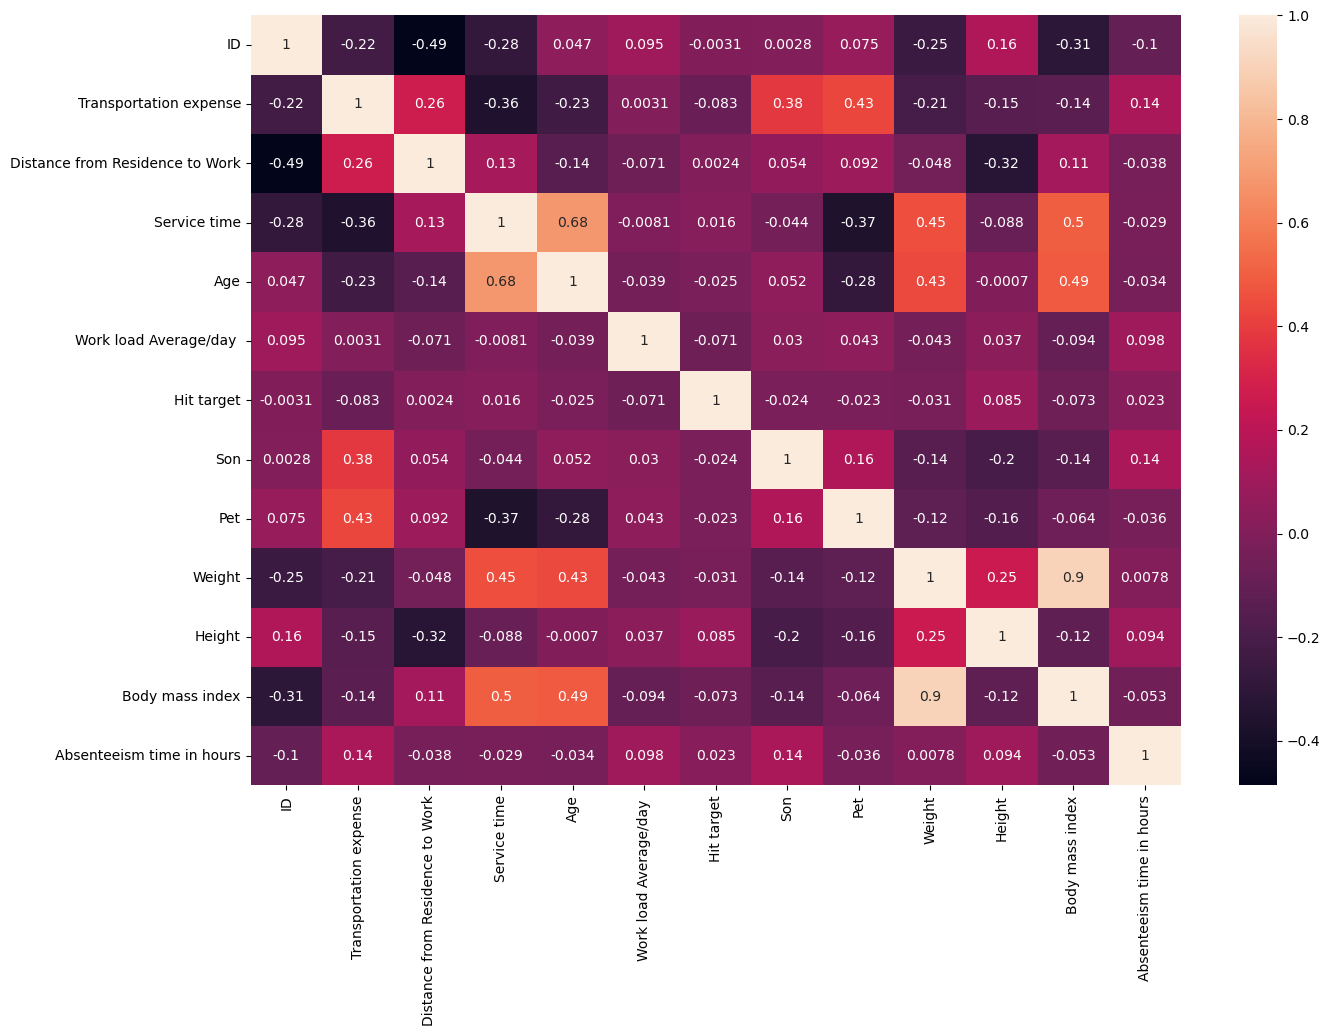

In [44]:
plt.figure(figsize=(15, 10))
sns.heatmap(conti.corr(), annot=True)
plt.show()

# Simple Liner Regression

In [45]:
final_df.columns

Index(['ID', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Son',
       'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Reason for absence', 'Month of absence',
       'Day of the week', 'Seasons', 'Disciplinary failure', 'Education',
       'Social drinker', 'Social smoker'],
      dtype='object')

In [46]:
x = final_df[['Reason for absence', 'Day of the week', 'Work load Average/day ', 'Disciplinary failure', 'Son', 'Social drinker']].to_numpy().reshape(-1,6)
y = final_df["Absenteeism time in hours"].to_numpy().reshape(-1, 1)

In [47]:
# Train-test split 70/30
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

In [48]:
linear_model = LinearRegression()
Simple_linear = linear_model.fit(x_train, y_train)
r_sq_train = Simple_linear.score(x_train, y_train)
y_pred = Simple_linear.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_sq_testing = Simple_linear.score(x_test, y_test)

print("R2_Square Training model performance:", r_sq_train)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2_Square Testing model performance:", r_sq_testing)

R2_Square Training model performance: 0.24507550941798728
MSE: 0.6803801220608406
RMSE: 0.8248515757764184
MAE: 0.6245273340124037
R2_Square Testing model performance: 0.2612672217605485


In [49]:
print("INTERCEPT:", linear_model.intercept_)
print("COEFFICIENT:", linear_model.coef_)

INTERCEPT: [0.73761288]
COEFFICIENT: [[-0.04926201  0.01965344  0.09218761 -0.85055952  0.1226263   0.2676385 ]]


# Table contaning residuals

<Axes: ylabel='residual'>

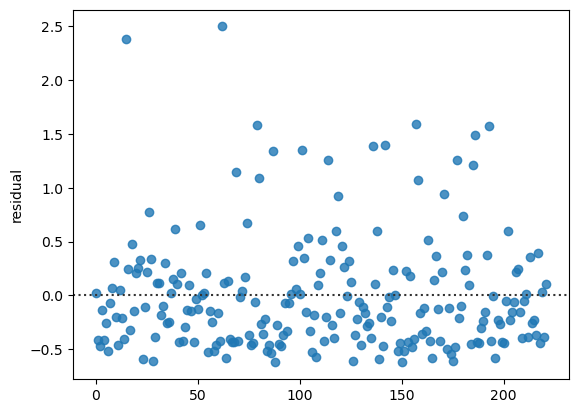

In [50]:
df_res = pd.DataFrame()
df_res["y_predicted"] = pd.DataFrame(y_pred)
df_res["y_actual"] = pd.DataFrame(y_test)
df_res["residual"] = abs(df_res["y_predicted"] - df_res["y_actual"]) 
sns.residplot(x = df_res.index,y = "residual",data = df_res)

<Axes: xlabel='residual', ylabel='Count'>

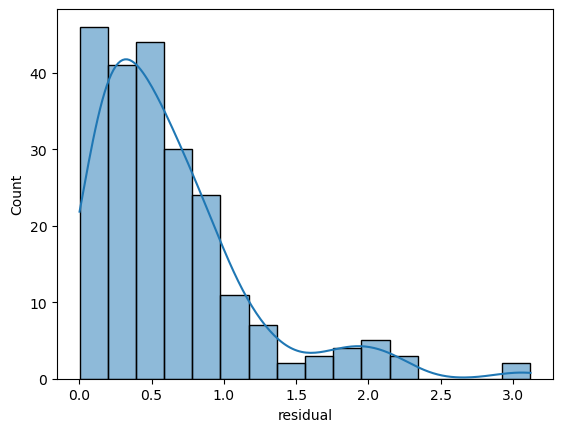

In [51]:
sns.histplot(df_res["residual"],kde = True )

In [52]:
# Interpretation 
# For Linear regression Model 

In [53]:
final_df.dtypes

ID                                   int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Son                                float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
Reason for absence                   int32
Month of absence                     int32
Day of the week                      int32
Seasons                              int32
Disciplinary failure                 int32
Education                            int32
Social drinker                       int32
Social smoker                        int32
dtype: object

# K means

In [54]:
x = np.array(final_df["Absenteeism time in hours"]).reshape(-1,1)

# Cluster Model
from sklearn.cluster import KMeans
err = []
mycluster = np.arange(2,11)
for k in mycluster:
  temp = KMeans(n_clusters = k)
  temp.fit(x)
  err.append(temp.inertia_)

In [55]:
err

[215.3532636817492,
 33.7148777735382,
 11.318744533821794,
 5.003571570135267,
 2.4702771639820194,
 1.0171840218598798,
 0.35983236232843474,
 0.04930024579622738,
 1.0127003977260616e-28]

Text(0, 0.5, 'value received from .inertia_')

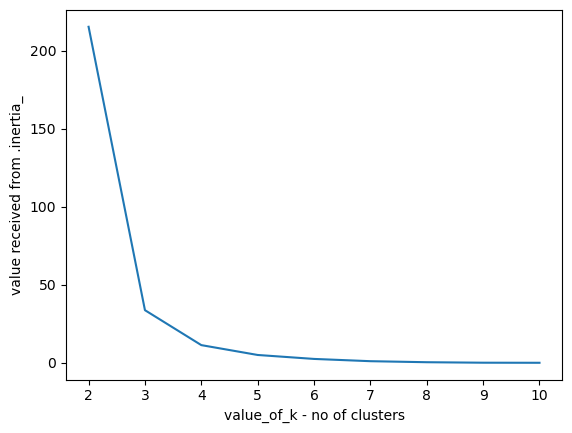

In [56]:
plt.plot(mycluster,err)
plt.xlabel("value_of_k - no of clusters")
plt.ylabel("value received from .inertia_")

In [57]:
for j in mycluster:
  temp_model = KMeans(n_clusters=j,random_state=0)
  cluster_labels = temp_model.fit_predict(x)
  silhouette_avg = silhouette_score(x,cluster_labels)*100
  print("for clusters  = ",j,"silhouette is", silhouette_avg)
  print("for clusters  = ",j,"davies_bouldin_score is", davies_bouldin_score(x,temp_model.labels_))
  print("for clusters  = ",j,"calinski_harabasz_score is", calinski_harabasz_score(x,temp_model.labels_))
  print()

for clusters  =  2 silhouette is 74.81126343228713
for clusters  =  2 davies_bouldin_score is 0.2306931024504969
for clusters  =  2 calinski_harabasz_score is 1233.3164277938142

for clusters  =  3 silhouette is 84.16224173593453
for clusters  =  3 davies_bouldin_score is 0.14189227034591115
for clusters  =  3 calinski_harabasz_score is 7719.6206757340315

for clusters  =  4 silhouette is 75.43723185709507
for clusters  =  4 davies_bouldin_score is 0.3293342615762833
for clusters  =  4 calinski_harabasz_score is 13424.61455660744

for clusters  =  5 silhouette is 84.00521890679099
for clusters  =  5 davies_bouldin_score is 0.25356740322625865
for clusters  =  5 calinski_harabasz_score is 26991.838096229432

for clusters  =  6 silhouette is 89.99655375308767
for clusters  =  6 davies_bouldin_score is 0.21393387512151277
for clusters  =  6 calinski_harabasz_score is 30449.63994536003

for clusters  =  7 silhouette is 98.19872857119695
for clusters  =  7 davies_bouldin_score is 0.09052420

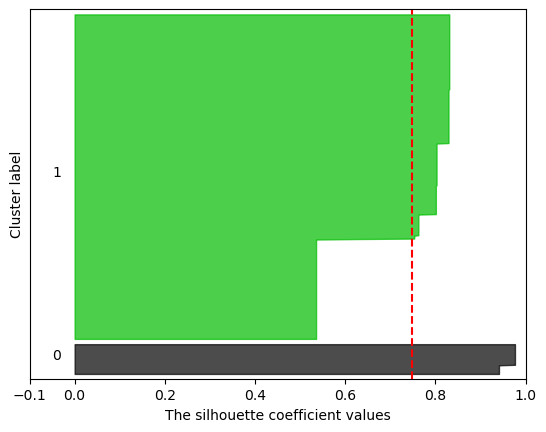

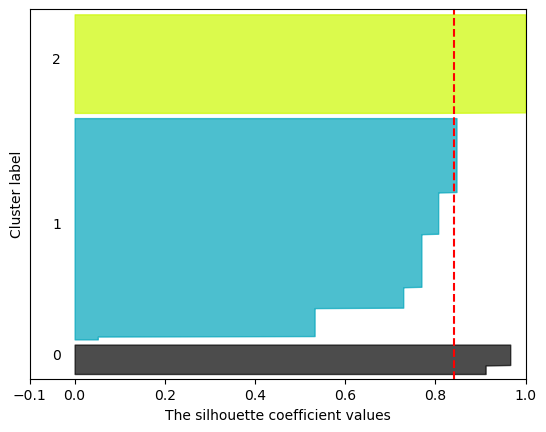

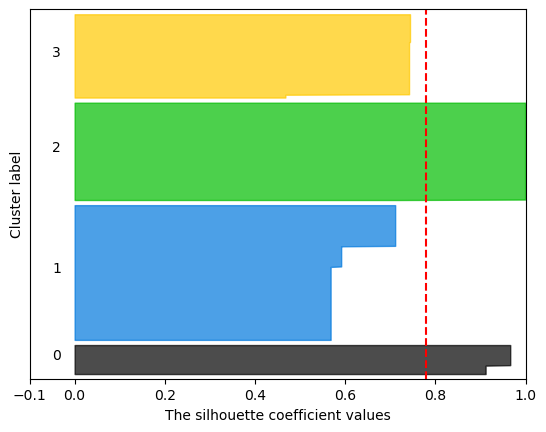

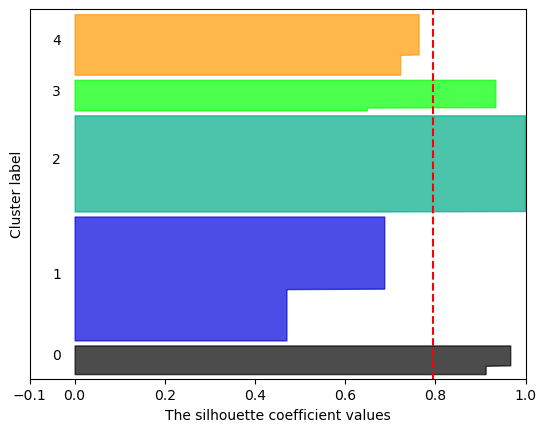

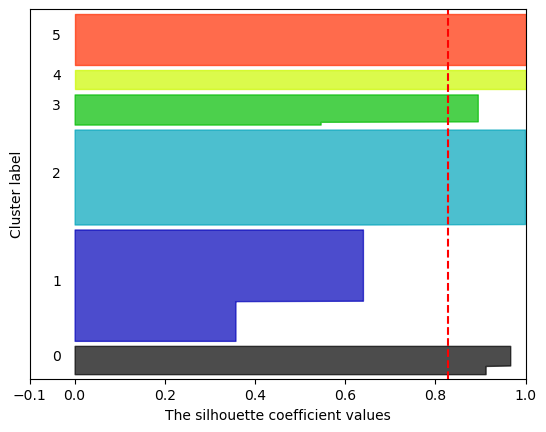

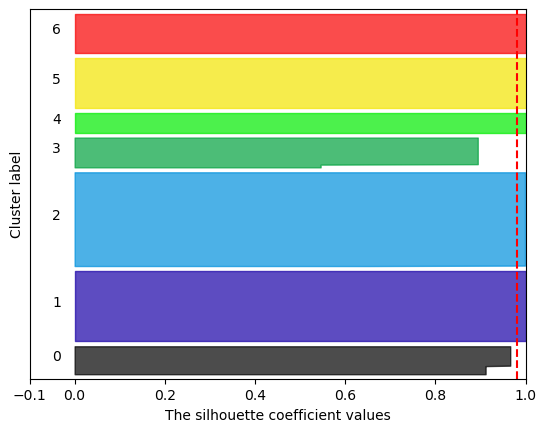

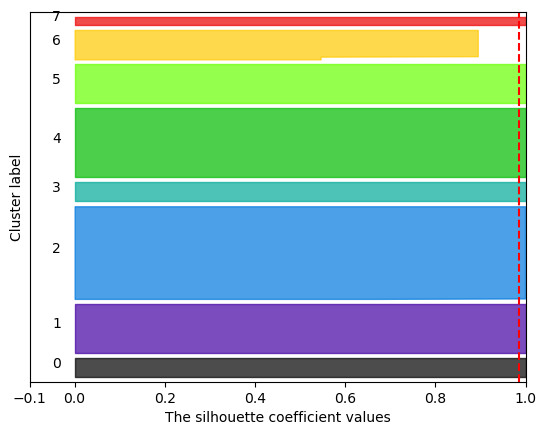

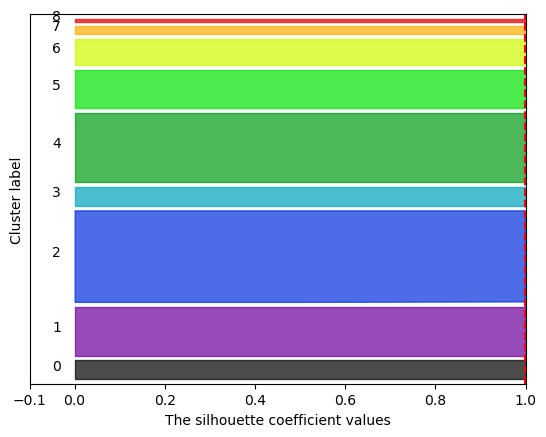

In [58]:
# Elbow Curve
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    sil_avg = silhouette_score(x,cluster_labels)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [59]:
# BY Seeing Visual we will finaled k as 3
k = 2

In [60]:
# Final Model

final_km = KMeans(n_clusters=2,random_state=0)
final_km.fit(x)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_ # Final model
clusters = final_km.fit_predict(x)
final_df['clusters'] = clusters
label_map = {0:"Rarely absent",
            1:"Frequently absent"}
final_df["cluster_label"] = final_df["clusters"].map(label_map)

In [61]:
# Model Performance

print("For Clusters = ",k,"Silhouettee Score is ",silhouette_score(x,final_km.labels_))
print("For Clusters = ",k,"davies_bouldin_score Score is ",davies_bouldin_score(x,final_km.labels_))
print("For Clusters = ",k,"calinski_harabasz_score  is ",calinski_harabasz_score(x,final_km.labels_))
print()

For Clusters =  2 Silhouettee Score is  0.7481126343228713
For Clusters =  2 davies_bouldin_score Score is  0.2306931024504969
For Clusters =  2 calinski_harabasz_score  is  1233.3164277938142



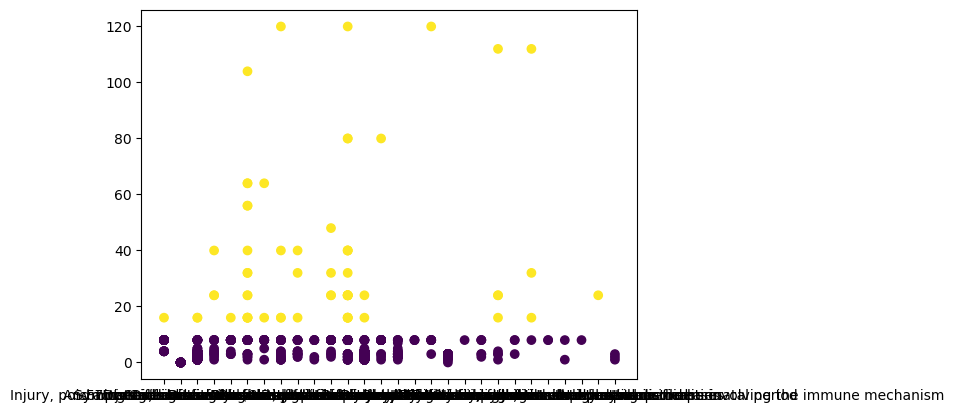

In [62]:
plt.scatter(df.loc[:,"Reason for absence"],df.loc[:,"Absenteeism time in hours"],c=final_km.labels_)

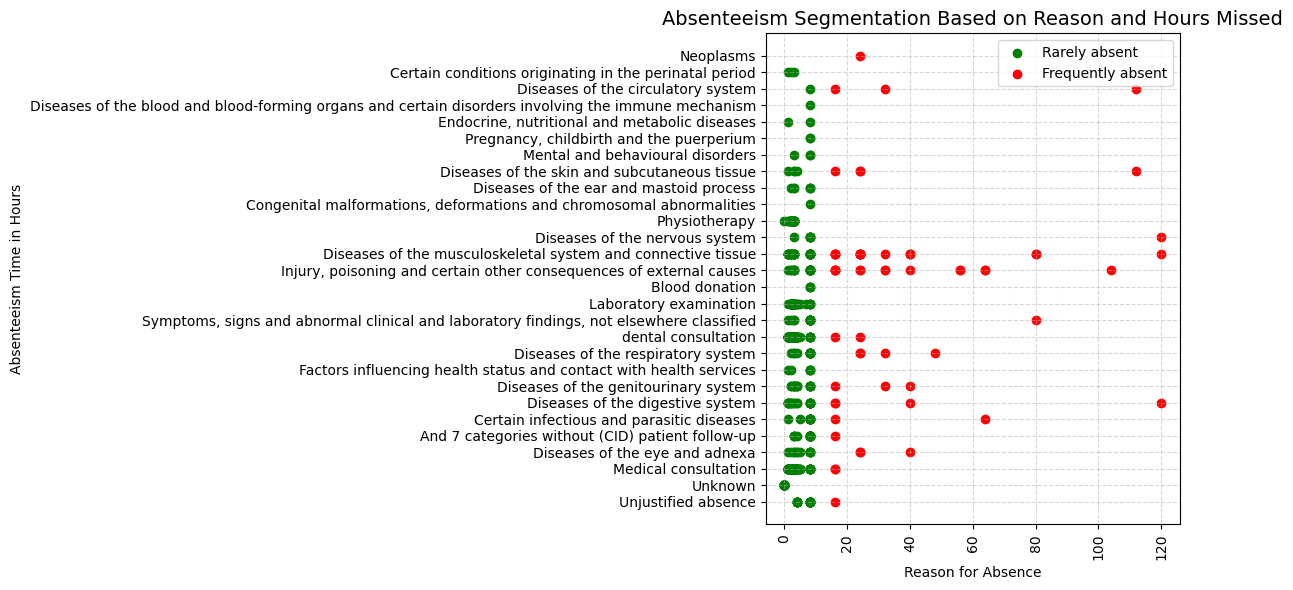

In [63]:
import matplotlib.pyplot as plt

# Define your segments and colors
segments = ['Rarely absent', 'Frequently absent']
mycolors = ["Green", "Red"]

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust the figure size for better readability

# Ensure `k` matches the number of clusters (should be 2 here)
for i in range(len(segments)):
    plt.scatter(
        df.loc[final_df.clusters == i, 'Absenteeism time in hours'],
        df.loc[final_df.clusters == i, 'Reason for absence'],
        c=mycolors[i],
        label=segments[i]
    )

# Add labels and formatting
plt.title('Absenteeism Segmentation Based on Reason and Hours Missed', fontsize=14)
plt.xlabel('Reason for Absence')
plt.ylabel('Absenteeism Time in Hours')
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [64]:
final_df.to_excel("Output_AbsenteeismAtWork_Data.xlsx", index=False)

# Logical Regression 

In [65]:
x_lg = final_df[['Reason for absence', 'Day of the week', 'Work load Average/day ', 'Disciplinary failure', 'Son', 'Social drinker']].to_numpy().reshape(-1,6)
y_lg = np.array(final_df['clusters']).reshape(-1,1)

In [66]:
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(x_lg,y_lg,train_size = 0.7,random_state = 42)

In [67]:
# Building the model
logreg = LogisticRegression()
# Training The Model
logreg.fit(x_train1,y_train1)

LogisticRegression()

In [68]:
logreg.score(x_train1,y_train1)

0.9092664092664092

In [69]:
y_pred1 = logreg.predict(x_test1)

In [70]:
print("ACCURACY SCORE :",accuracy_score(y_test1,y_pred1))
print("F1 Score : ",f1_score(y_test1,y_pred1,average = "weighted"))
print("ROC Score ",roc_auc_score(y_test1,logreg.predict_proba(x_test1)[:,1]))

ACCURACY SCORE : 0.9279279279279279
F1 Score :  0.8932390334259492
ROC Score  0.8094660194174758


In [71]:
print(confusion_matrix(y_test1,y_pred1))

[[206   0]
 [ 16   0]]


In [72]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       206
           1       0.00      0.00      0.00        16

    accuracy                           0.93       222
   macro avg       0.46      0.50      0.48       222
weighted avg       0.86      0.93      0.89       222



In [73]:
y_probas = logreg.predict_proba(x_test1)

In [74]:
lr_probs = logreg.predict_proba(x_test1)
ns_probs = [0 for _ in range(len(y_test1))]

No Skill: ROC AUC = 0.500
Logistic: ROC AUC = 0.809


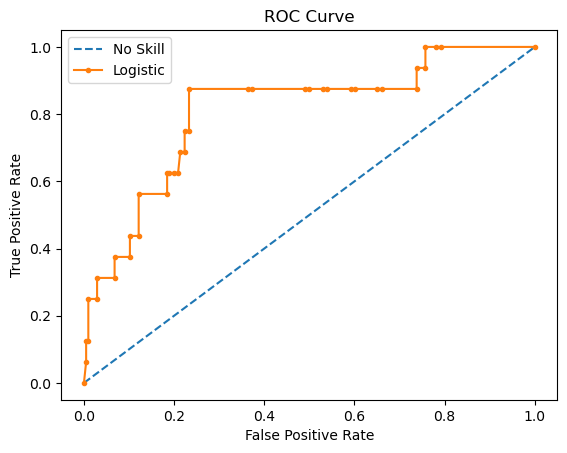

In [75]:
lr_probs = y_probas[:, 1]
ns_probs = [0 for _ in range(len(y_test1))]
ns_auc = roc_auc_score(y_test1, ns_probs)
lr_auc = roc_auc_score(y_test1, lr_probs)

print('No Skill: ROC AUC = %.3f' % ns_auc)
print('Logistic: ROC AUC = %.3f' % lr_auc)


ns_fpr, ns_tpr, _ = roc_curve(y_test1, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test1, lr_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# KNN 

In [77]:
x2 = final_df[['Reason for absence', 'Day of the week', 'Work load Average/day ', 'Disciplinary failure', 'Son', 'Social drinker']].to_numpy().reshape(-1,6)
y2 = np.array(final_df['clusters']).reshape(-1,1)

In [84]:
x_tr2,x_te2,y_tr2,y_te2 = train_test_split(x2,y2,train_size = 0.8,random_state = 42)

In [79]:
n = int(round(len(x_tr2)**0.5,0))
n

24

In [80]:
acc = []
k_values = np.arange(2,40,4)
for myk2 in k_values:
    temp = KNeighborsClassifier(myk2)
    temp.fit(x_tr2,y_tr2)
    y_pr2 = temp.predict(x_te2)
    acc.append(accuracy_score(y_te2,y_pr2))
print(acc)
print(k_values)

[0.9054054054054054, 0.9256756756756757, 0.9256756756756757, 0.9256756756756757, 0.9256756756756757, 0.9256756756756757, 0.9256756756756757, 0.9256756756756757, 0.9256756756756757, 0.9256756756756757]
[ 2  6 10 14 18 22 26 30 34 38]


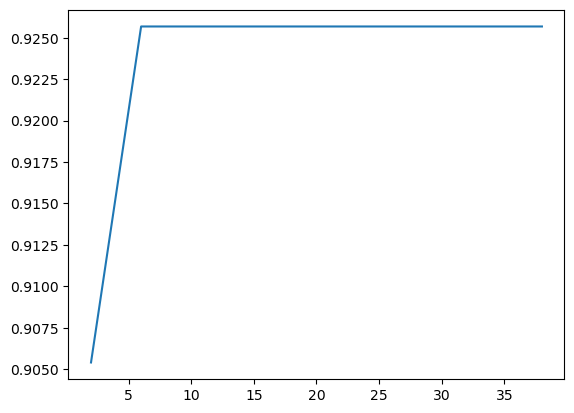

In [81]:
plt.plot(k_values, acc)

In [82]:
k = 6 

In [83]:
final_model = KNeighborsClassifier(k)

final_model.fit(x_tr2,y_tr2)
print("Training Performance :",final_model.score(x_tr2,y_tr2)) # Training model performance
y_pred2 = final_model.predict(x_te2)
print("Accuracy:",accuracy_score(y_te2,y_pred2))
f1 = f1_score(y_te2, y_pred2,average = "weighted")
print("F1 Score :", f1)

Training Performance : 0.9138513513513513
Accuracy: 0.9256756756756757
F1 Score : 0.8899478425794216


# ----------------------------------------------------------------------------------------------------------------